In [48]:
#importing all the libraries needed
import numpy as ln
import numpy as np 
#pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate 
import csv

# Question 1

In [12]:
thickness_in_mm = 1 #thickness of the paper as stated in the question
height_of_mount_everest_in_m = 8848 #desired height in meters, as stated in the question 

#changing height of mount everest in m to mm = 8848 * 1000 = 8848000
height_of_mount_everest_in_mm = 8848000

number_of_folds = ln.log(height_of_mount_everest_in_mm)/ln.log(2) #formula for finding the number of folds

message = 'The piece of paper should be folded more than {} to exceed the height of mount everest'
print(message.format(number_of_folds))

The piece of paper should be folded more than 23.076919954896795 to exceed the height of mount everest


# Question 2

In [3]:
a = 0.1 #value of a as given in the question

#np.log gives you the value of ln()
t = -(np.log(0.5)/(a)) #formula for finding the time it will take to decrease. After making the t subject from the initial equation, v(t) = V0e^-at
message = 'It will take more than {} seconds for the volume to decrease to less than half of its initial volume'
print(message.format(t)) 
      

It will take more than 6.931471805599452 seconds for the volume to decrease to less than half of its initial volume


# Question 3

In [54]:
principal_amount = 100 #principal amount as given in the question
rate = 0.05  #rate of interest
time = [1,2,3,4,5] #array of the years

for i in time: #for every year in the time list
    amount = principal_amount*(1+rate)**i #use this formula to find the amount earned
    message = 'You will have ${} after {} years'  #print it in this format 
#after each year in the time array, you will have
    print(message.format(round(amount), i)) #round the amounts to the nearest dollars and print them


You will have $105 after 1 years
You will have $110 after 2 years
You will have $116 after 3 years
You will have $122 after 4 years
You will have $128 after 5 years


# Question 4 

In [4]:
price_of_car = 20000 #price of car as stated in the question (loan amount)
rate = 0.01  #interest rate of the loan amount
time = [12,24,36] #time in which the instalment need to be paid 

for i in time: #for every value in the time list
    amount_per_month = (price_of_car*(rate/(1-(1+rate)**-i))) #use this formula to calculate the amount to be paid per month 
    message = 'You will pay ${} per month after {} months' #print the result in this format 
    print(message.format(round(amount), i)) #round the amounts to the nearest dollars and print them


You will pay $1777 per month after 12 months
You will pay $941 per month after 24 months
You will pay $664 per month after 36 months


# Question 5

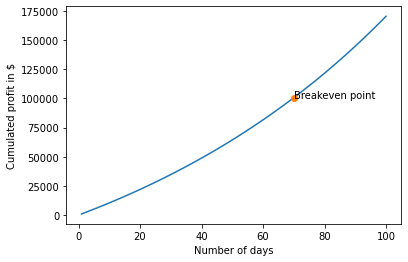

In [11]:
x = [] #create an empty list, x
for i in range (1,101): #iterate from 1 to 100
    x.append(i) #append all the numbers in the x, list 
#print(x)
y = [] #create an empty array, y
sum = 0 #initialize a variable called sum, to help with the cumulative profits  
for num in x: #for all the numbers in the x list 
    j = 1000*(1.01)**(num-1) #use the formula to calculate for individual j value (profit per day) with the respective num in the list 
    #print(round(j))
    sum += j #find the cumulative sum of the j value 
    y.append(round(sum)) #add them into th y list after you round them
plt.xlabel('Number of days') #name of the x axis
plt.ylabel('Cumulated profit in $')  #name of the y axis
plt.plot(x,y) #plot the graph
plt.plot(70, 100676, marker='o') #mark this point with an o marker 
plt.annotate("Breakeven point", (70, 100676)) #write a text at the point given
plt.show()

# Question 6

              Cases   Death     Diff  Noofdays
2014-03-22     49.0    29.0      2.0       1.0
2014-03-23     67.5    44.0      1.5       2.0
2014-03-24     86.0    59.0      1.0       3.0
2014-03-25     86.0    60.0      1.0       4.0
2014-03-26     86.0    62.0      1.0       5.0
...             ...     ...      ...       ...
2014-11-08  13894.4  5451.8      2.6     232.0
2014-11-09  14068.0  5496.0      2.0     233.0
2014-11-10  14225.5  5494.0      1.5     234.0
2014-11-11  14383.0  5492.0      1.0     235.0
2014-11-12  14413.0  5498.0 -41955.0     236.0

[236 rows x 4 columns]
The date for when the cases exceed 100 is 2014-03-27 00:00:00
The date for when the cases exceed 500 is 2014-06-13 00:00:00
The date for when the cases exceed 1000 is 2014-07-15 00:00:00
The date for when the cases exceed 2000 is 2014-08-12 00:00:00
The date for when the cases exceed 5000 is 2014-09-12 00:00:00
The date for when the death exceed 100 is 2014-04-06 00:00:00
The date for when the death exceed 50

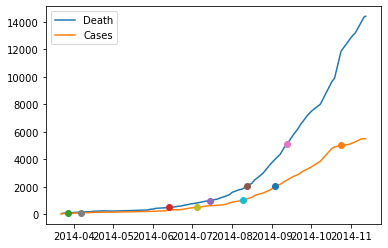

In [42]:
data = pd.read_excel("ebola_download.xls") #importing and reading the ebola data 
data = data.set_index('Date') #setting the date column as the index 
dat = pd.date_range('2014-03-22','2014-11-12') #generating dates within the range given 
data = data.reindex(dat,fill_value=np.NAN) #filling all null values 
data=data.interpolate() #interpolating the data dataframe 
print(data)   #printing the data after interpolation 
y = data['Cases'] #renaming the cases column to y
z = data['Death'] #renaming the death column to z
plt.plot(dat,y,label='Death') #plot the death column on the graph
plt.plot(dat,z,label='Cases')  #plot the cases column on the graph
plt.legend() #show the meaning of the various colors in the graph

#creating lists to store the variables for the respective death and cases above a given range 
points_above_100_z = []
points_above_100_y = []

points_above_500_z = []
points_above_500_y = []

points_above_1000_z = []
points_above_1000_y = []

points_above_2000_z = []
points_above_2000_y = []

points_above_5000_z = []
points_above_5000_y = []


#finding all the points above a cases range and plotting them on the graph
count = 0
for row in y: #loop through the cases column
    count += 1 #keep a count
    if( row > 100): #find the point where a case is greater than 100
        points_above_100_y.append(row) #append it to the list 
        break
    
plt.plot(dat[count-1], points_above_100_y[0], marker = 'o' ) #print that point on the graph
print("The date for when the cases exceed 100 is", dat[count-1])
# print(points_above_100_y[0])

#from this point onward, repeat the previous steps to find the remaining point, case > 500, 1000, 2000, 5000
count = 0
for m in y:
    count += 1    
    if(m > 500):
        points_above_500_y.append(m)
        break
plt.plot(dat[count-1], points_above_500_y[0], marker = 'o' ) 
print("The date for when the cases exceed 500 is",dat[count-1])

count = 0
for p in y:
    count += 1    
    if(p > 1000):
        points_above_1000_y.append(p)
        break
plt.plot(dat[count-1], points_above_1000_y[0], marker = 'o' ) 
print("The date for when the cases exceed 1000 is",dat[count-1])

count = 0
for v in y:
    count += 1    
    if(v > 2000):
        points_above_2000_y.append(v)
        break
plt.plot(dat[count-1], points_above_2000_y[0], marker = 'o' ) 
print("The date for when the cases exceed 2000 is",dat[count-1])

count = 0
for q in y:
    count += 1    
    if(q > 5000):
        points_above_5000_y.append(q)
        break
plt.plot(dat[count-1], points_above_5000_y[0], marker = 'o' ) 
print("The date for when the cases exceed 5000 is",dat[count-1])


#doing the same for death cases 
count = 0
for row in z:
    count += 1
    if( row > 100):
        points_above_100_z.append(row)
        break
    
plt.plot(dat[count-1], points_above_100_z[0], marker = 'o' )
print("The date for when the death exceed 100 is", dat[count-1])
# print(points_above_100_z[0])

count = 0
for m in z:
    count += 1    
    if(m > 500):
        points_above_500_z.append(m)
        break
plt.plot(dat[count-1], points_above_500_z[0], marker = 'o' ) 
print("The date for when the death exceed 500 is",dat[count-1])

count = 0
for p in z:
    count += 1    
    if(p > 1000):
        points_above_1000_z.append(p)
        break
plt.plot(dat[count-1], points_above_1000_z[0], marker = 'o' ) 
print("The date for when the death exceed 1000 is",dat[count-1])

count = 0
for v in z:
    count += 1    
    if(v > 2000):
        points_above_2000_z.append(v)
        break
plt.plot(dat[count-1], points_above_2000_z[0], marker = 'o' ) 
print("The date for when the death exceed 2000 is",dat[count-1])

count = 0
for q in z:
    count += 1    
    if(q > 5000):
        points_above_5000_z.append(q)
        break
plt.plot(dat[count-1], points_above_5000_z[0], marker = 'o' ) 
print("The date for when the death exceed 5000 is",dat[count-1])
           
 #showing the final plot        
plt.show()

# Question 7

In [46]:
average_growth_rate_per_day_of_cases = data['Cases'].pct_change().mean()*100 #calculating the average growth rate of cases using pct_change
print('The average growth of case per day is,', average_growth_rate_per_day_of_cases)

#calculating the average growth rate of deaths using pct_change
average_growth_rate_per_day_of_death = data['Death'].pct_change().mean()*100 
print('The average growth of death per day is ,', average_growth_rate_per_day_of_death)

The average growth of case per day is, 2.5065218916499976
The average growth of death per day is , 2.3306080833679697


# Question 8

The average ratio is:  0.5650643845954079


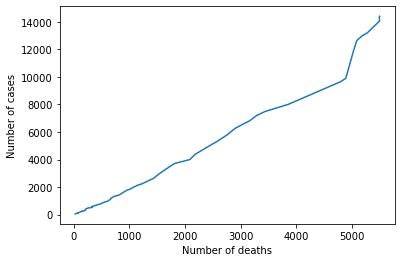

In [34]:
data = pd.read_excel("ebola_download.xls") #importing and reading the ebola data 
noofdays = list(data['Noofdays']) #list of noofdays
deaths = list(data['Death']) #list of death
cases = list(data['Cases']) #list of cases
plt.plot(deaths,cases) #plot death by cases
plt.xlabel('Number of deaths') #label the x-axis
plt.ylabel('Number of cases') #label the y-axis
avg_ratio = (data['Death']/data['Cases']).mean() #calculate the mean
print('The average ratio is: ',avg_ratio)

# Question 9

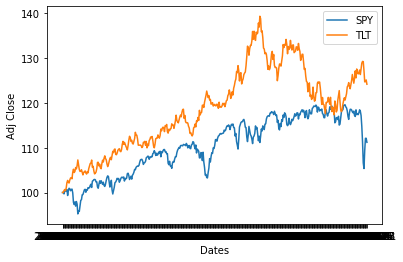

In [143]:
SPY = pd.read_csv("SPY.csv") #read the spy csv file 
TLT = pd.read_csv('TLT.csv') #read the TLT csv file 
dates = SPY['Date'] #store the date column in the date variable 
SPY = SPY.set_index('Date') #set the date column as index 
dates = dates[1:len(SPY)] #get all dates excluding the first date in the column

SPY['Adj Close'] =SPY['Adj Close'][1:len(SPY)]/SPY['Adj Close'][1]*100 #normalise the data by making the first data 100
y= SPY['Adj Close'][1:len(SPY)] #name this section of data, y
plt.plot(dates,y,label='SPY') #plot it on a graph 

TLT['Adj Close'] =TLT['Adj Close'][1:len(TLT)]/TLT['Adj Close'][1]*100 #redo the normalization
z= TLT['Adj Close'][1:len(TLT)] #rename this section of data to z 
plt.plot(dates,z,label='TLT') #plot the dates and TLT adj close on a graph  
plt.xlabel('Dates') #label x-axis, dates 
plt.ylabel('Adj Close') #label y-axis, adj close
plt.legend() #show the meanings of your colors 
plt.show() 

# Question 10

In [194]:

#calculating the average, min and maximum daily returns
daily_returns = [] #daily returns will keep track of all the daily returns values 
for i in range(2,len(SPY)):
    daily_returns.append(SPY['Adj Close'][i]/SPY['Adj Close'][i-1]-1) #append each  daily returns value to the daily returns list 
daily_returns_arr = np.array(daily_returns) #convert the daily returns list to an array 
print('The daily returns for SPY is:',daily_returns_arr)    

min_SPY=daily_returns_arr.min()*100 #find the min daily returns 
print('The minimum daily return for SPY is:',min_SPY)

max_SPY=daily_returns_arr.max()*100 #find the max daily returns 
print('The maximum daily return for SPY is:',max_SPY)

avg_SPY=daily_returns_arr.mean()*100 #find the avg daily returns 
print('The average daily return for SPY is:',avg_SPY)

#for TLT EFT
print('\n')
print('For TLT EFT')
daily_returns_TLT = []
for i in range(2,len(TLT)):
    daily_returns_TLT.append(TLT['Adj Close'][i]/TLT['Adj Close'][i-1]-1) #appending TLT data daily returns to its list  
daily_returns_TLT_arr = np.array(daily_returns_TLT) #converting the list to an array 
print("The daily returns for TLT: ",daily_returns_TLT_arr)    

min_TLT=daily_returns_TLT_arr.min()*100 #find the min daily returns
print('The minimum daily return for TLT is:',min_TLT)

max_TLT=daily_returns_TLT_arr.max()*100 #find the max daily returns 
print('The maximum daily return for TLT is:',max_TLT)

avg_TLT=daily_returns_TLT_arr.mean()*100 #find the avg daily returns 
print('The average daily return for TLT is:',avg_TLT)


The daily returns for SPY is: [-1.63968677e-04 -2.89840014e-03  6.14180595e-03  2.18149013e-04
  6.53826151e-04  2.72275363e-03 -1.33052359e-02  1.08977551e-02
  5.39037605e-03 -1.29985805e-03 -4.22953908e-03  2.94090369e-03
  6.51190777e-04 -8.19315461e-03 -2.13357844e-02 -4.91955311e-03
  5.95501403e-03 -9.60519195e-03  1.06004037e-02 -5.85849394e-03
 -2.25052101e-02  7.00483940e-03 -1.25436123e-03  1.31870173e-02
  1.23954333e-02  1.83686369e-03  1.09439141e-02  4.94736317e-04
  5.16260875e-03  5.51858813e-03  1.19581567e-03 -6.62177280e-03
  5.90095840e-03 -1.14051313e-03  5.54664125e-03 -3.78659662e-04
  5.39872273e-05  5.24760561e-03  2.52930668e-03 -7.03181861e-03
  1.40553251e-02  9.06354008e-04  2.29021212e-03  4.25400985e-04
 -5.31245452e-04 -4.94266156e-03  2.66990282e-04 -1.12132601e-02
 -2.80779845e-03  9.04352823e-03  7.13790889e-03 -5.32894783e-03
  5.83954150e-03 -3.87838200e-03 -4.13557074e-03  4.74580100e-03
 -7.19240107e-03 -2.10810881e-03  4.93010936e-03  8.19432042